# Default of Credit Card Clients

#### In this project, we came up with three hypotheses: Equal means of Bill Amount, Default rate prediction and Credit limit determination. 

#### The codes below are for Hypo2, which applied ML models including Logistic Regression, Random Forest to analyze top factors that influence default rate. 


In [1]:
# suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### PART I: Import & understand data

In [3]:
df = pd.read_csv('default of credit card clients.csv')
df = df.iloc[1:,1:]

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,230000,2,6,2,46,0,0,0,0,0,...,186635,189896,193351,10000,9000,8000,8000,7500,7000,0
2,30000,1,6,1,53,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,360000,1,6,1,66,-1,-1,-1,-1,-1,...,151858,48580,1451,75351,4064,152618,48822,1451,171944,0
4,270000,1,6,2,32,-2,-2,-2,-2,-2,...,40359,51264,34874,52398,27787,40569,53500,35051,120391,0
5,90000,2,6,2,49,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,11135,0


In [5]:
df.X3.unique()

array(['6', '5', '4', '3', '2', '1', '0'], dtype=object)

In [6]:
df.X4.unique()

array(['2', '1', '3', '0'], dtype=object)

In [7]:
df = df.astype(int)

## PART II: Build ML Models

### 1. Built ML models based on only Demographic Information

In [8]:
X = df.loc[1:, ['X2', 'X3', 'X4', 'X5']]
y = df.Y

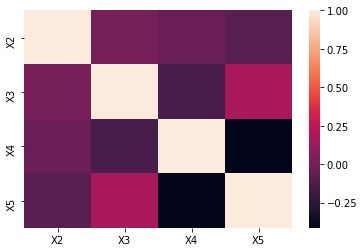

In [9]:
# show heatmap of correlations
sns.heatmap(X.corr())

### 1.1 Split dataset

In [10]:
# create dummy variables for categorical features.
X = pd.get_dummies(X,columns=['X2', 'X3', 'X4'], drop_first = True)

# Splite data into training and testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [11]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Logistic Regression
classifier_logistic = LogisticRegression()

#Random Forest
classifier_RF = RandomForestClassifier()

In [13]:
# 1.train the model with logistic
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# 2.train the model with Random Forest
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
#use 5-fold cross validation  to get the accuracy for different models
model_names = ['Logistic Regression', 'Random Forest']
model_list = [classifier_logistic, classifier_RF]

count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5) #cv: cross validation, calculate the overall accuracy not precision or recall 
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.77650489 0.77666667 0.77666667 0.77666667 0.77662013]
Model accuracy of Logistic Regression is 0.7766250048014324
[0.77088107 0.77020833 0.771875   0.77041667 0.77099396]
Model accuracy of Random Forest is 0.7708750047037762


### model 1: Logistic Regression

In [16]:
#calculate accuracy, precision and recall for logistic Regression
y_pred = classifier_logistic.predict(X_test)
y_pred_probs = classifier_logistic.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4725
           1       0.00      0.00      0.00      1275

    accuracy                           0.79      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.62      0.79      0.69      6000



Text(0.5, 0, 'Threshold')

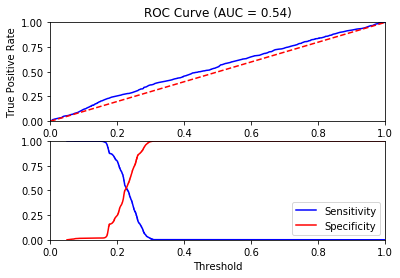

In [17]:
# ROC curve and threshold plot

plt.subplot(2, 1, 1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2, 1, 2)

plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
plt.legend(loc = 'lower right')
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel('Threshold')

### Model II: Random Forest

In [18]:
y_pred = classifier_RF.predict(X_test)
y_pred_probs = classifier_RF.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4725
           1       0.15      0.00      0.01      1275

    accuracy                           0.78      6000
   macro avg       0.47      0.50      0.44      6000
weighted avg       0.65      0.78      0.69      6000



Text(0.5, 0, 'Threshold')

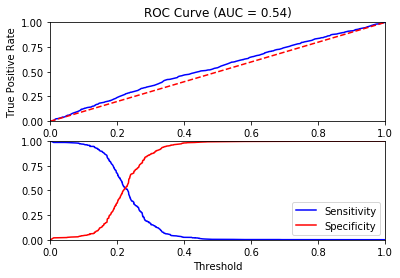

In [19]:
plt.subplot(2, 1, 1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2, 1, 2)

plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
plt.legend(loc = 'lower right')
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel('Threshold')


## Data with Demographic infomation, Bill_Amount, and Payment_Amount

In [20]:
colnames = list(range(1,5))+ list(range(11, 23))
X1 = df.iloc[:, colnames]
y = df.Y

In [21]:
X1 = pd.get_dummies(X1,columns=['X2', 'X3', 'X4'], drop_first = True)

In [22]:
X1_train, X1_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size = 0.2)

scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

#Logistic Regression
classifier_logistic = LogisticRegression()
#Random Forest
classifier_RF = RandomForestClassifier()

# train the model with logistic
classifier_logistic.fit(X1_train, y_train)
#train the model with Random Forest
classifier_RF.fit(X1_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model I: Logistic Regression

In [23]:
#calculate accuracy, precision and recall
y_pred = classifier_logistic.predict(X1_test)
y_pred_probs = classifier_logistic.predict_proba(X1_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4660
           1       0.00      0.00      0.00      1340

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.78      0.68      6000



Text(0.5, 0, 'Threshold')

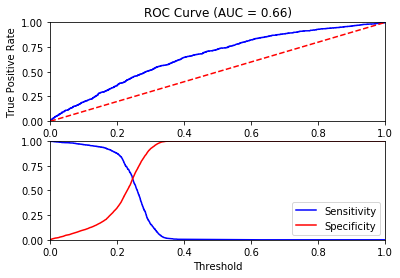

In [24]:
# ROC curve and threshold plot

plt.subplot(2, 1, 1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2, 1, 2)

plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
plt.legend(loc = 'lower right')
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel('Threshold')

[Text(0, 0, 'X4_1'),
 Text(0, 0, 'X3_3'),
 Text(0, 0, 'X3_1'),
 Text(0, 0, 'X3_2'),
 Text(0, 0, 'X12'),
 Text(0, 0, 'X19')]

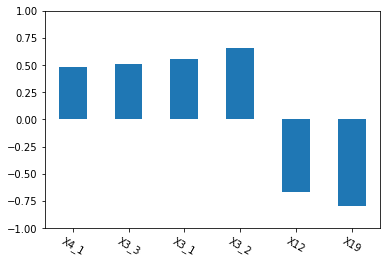

In [25]:
## Plot top 6 most significant features
top_idx = list(np.argsort(np.abs(classifier_logistic.coef_[0]))[-6:]) ##logistic is 2-dimension
bplot = pd.Series(classifier_logistic.coef_[0][top_idx])
selected_features = pd.Series(X1.columns)
xticks = selected_features[top_idx]
p2 = bplot.plot(kind='bar',rot=-30,ylim=(-1,1))
p2.set_xticklabels(xticks)

In [26]:
classifier_logistic.coef_[0] ##two-dimension, choose the first column

array([-0.01617252, -0.66548562,  0.35201064,  0.18198331,  0.0074145 ,
        0.24679785,  0.05338352, -0.41771109, -0.7967839 , -0.11959273,
       -0.21072443, -0.0920513 , -0.0873756 , -0.11348456,  0.55098181,
        0.65569338,  0.50954421, -0.0179239 , -0.0030855 ,  0.01522732,
        0.4823137 ,  0.41436495,  0.11156003])

## Random Forest

In [27]:
y_pred = classifier_RF.predict(X1_test)
y_pred_probs = classifier_RF.predict_proba(X1_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      4660
           1       0.48      0.19      0.27      1340

    accuracy                           0.77      6000
   macro avg       0.64      0.57      0.57      6000
weighted avg       0.73      0.77      0.73      6000



Text(0.5, 0, 'Threshold')

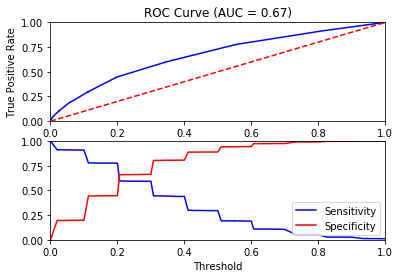

In [28]:
plt.subplot(2, 1, 1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2, 1, 2)

plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
plt.legend(loc = 'lower right')
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel('Threshold')


[Text(0, 0, 'X17'),
 Text(0, 0, 'X13'),
 Text(0, 0, 'X19'),
 Text(0, 0, 'X18'),
 Text(0, 0, 'X5'),
 Text(0, 0, 'X12')]

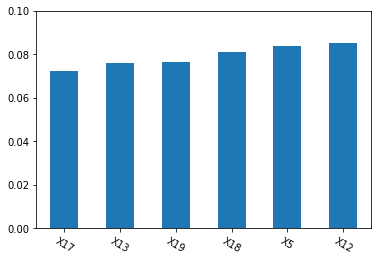

In [29]:
top_idx = list(np.argsort(classifier_RF.feature_importances_)[-6:]) 
bplot = pd.Series(classifier_RF.feature_importances_[top_idx])
selected_features = pd.Series(X1.columns)
xticks = selected_features[top_idx]
p2 = bplot.plot(kind='bar',rot=-30,ylim=(0,0.1))
p2.set_xticklabels(xticks)

## Conclusion: 
### 1) data with only demographic info ---- Logistic Regression: 0.54, Random Forest: 0.54; 
###     data with demographic info, Bill_Amount, and Payment_Amount---- Logistic Regression: 0.66, Random  Forest: 0.67
### Therefore, the model results will be better when considering Bill_Amount and Payment_Amount. Since the AUC of RF is larger than LR, RF model is better when we want to predict default rate.

### From the RF model, we can see variable "age" is more related to the default rate prediction. 